## Sales Dashboard

Below is just some code, this dashboard displays
- the revenue
- for the two customer "status" types "standard" and "premium"
- per day

In [1]:
import pandas as pd
import os

def get_todays_date():
    """ NO NEED TO UNDERSTAND THIS FUNCTION, IT'S JUST A UTILITY FOR LATER...
    The "day" is saved to a file, this function returns the day 
    e.g. "day-1", "day-2",..."""
    dag_path = os.getcwd()
    date_file = open("raw_data/current_day.txt", "r")
    return date_file.readline().strip()

In [2]:
today = get_todays_date()
print("Today is: ", today)

Today is:  day-2


In [9]:
# Read sales data
sales = pd.read_csv(f"processed_data/{today}/agg_sales.csv", header=0)

In [10]:
# Filter for each status
premium_sales = sales[sales['status'].str.contains("premium")][["revenue","sales_date"]]
std_sales = sales[sales['status'].str.contains("standard")][["revenue","sales_date"]]

## Main Dashboard

<Axes: xlabel='sales_date'>

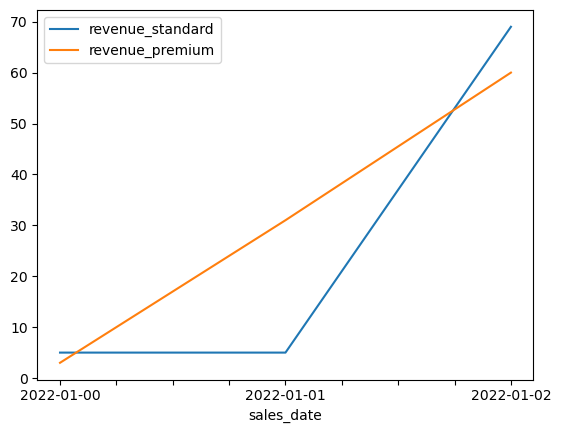

In [11]:
# Plot using pandas wrapper
plot_df=std_sales.merge(premium_sales, on="sales_date", how="left", suffixes=('_standard','_premium'))
plot_df.plot.line(x="sales_date")

Compare this to the data from yesterday:

<Axes: xlabel='sales_date'>

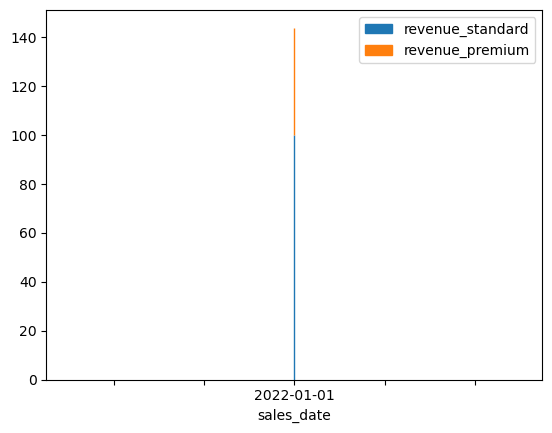

In [14]:
yesterday="day-1"

sales = pd.read_csv(f"processed_data/{yesterday}/agg_sales.csv", header=0)

# Filter for each status
premium_sales = sales[sales['status'].str.contains("premium")][["revenue","sales_date"]]
std_sales = sales[sales['status'].str.contains("standard")][["revenue","sales_date"]]

# Plot using pandas wrapper
plot_df=std_sales.merge(premium_sales, on="sales_date", how="left", suffixes=('_standard','_premium'))
plot_df.plot.area(x="sales_date")